/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

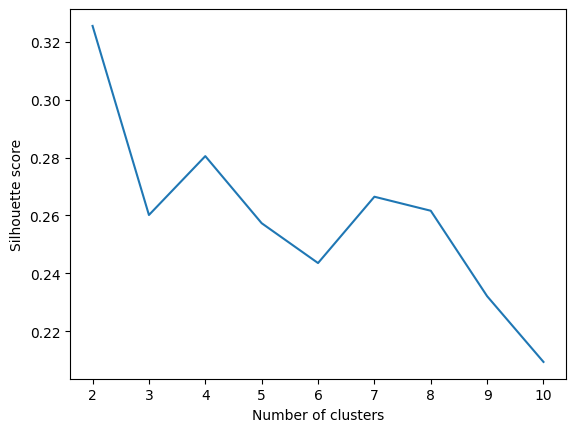

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-31-895517ee940c>:63: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df.groupby(['cluster']).mean()


             birthyr       a15       a16       a17       a18       a19  \
cluster                                                                  
0        1942.952212  0.000000  0.000000  0.024779  0.061947  0.107965   
1        1941.671233  0.000000  0.000000  0.021918  0.061187  0.110502   
2        1945.021097  0.000000  0.016878  0.050633  0.362869  1.071730   
3        1943.699029  0.271845  0.970874  1.077670  1.155340  1.174757   

              a20       a21       a22       a23       a24       a25       a26  \
cluster                                                                         
0        0.208850  0.343363  0.580531  1.242478  2.063717  3.265487  4.295575   
1        0.247489  0.400913  0.532420  0.673973  0.822831  1.020091  1.162557   
2        2.080169  3.303797  4.945148  5.578059  5.843882  5.953586  5.970464   
3        1.194175  1.330097  1.728155  2.048544  2.291262  2.660194  3.087379   

              a27       a28       a29       a30     wp00tbgp  wp00tb

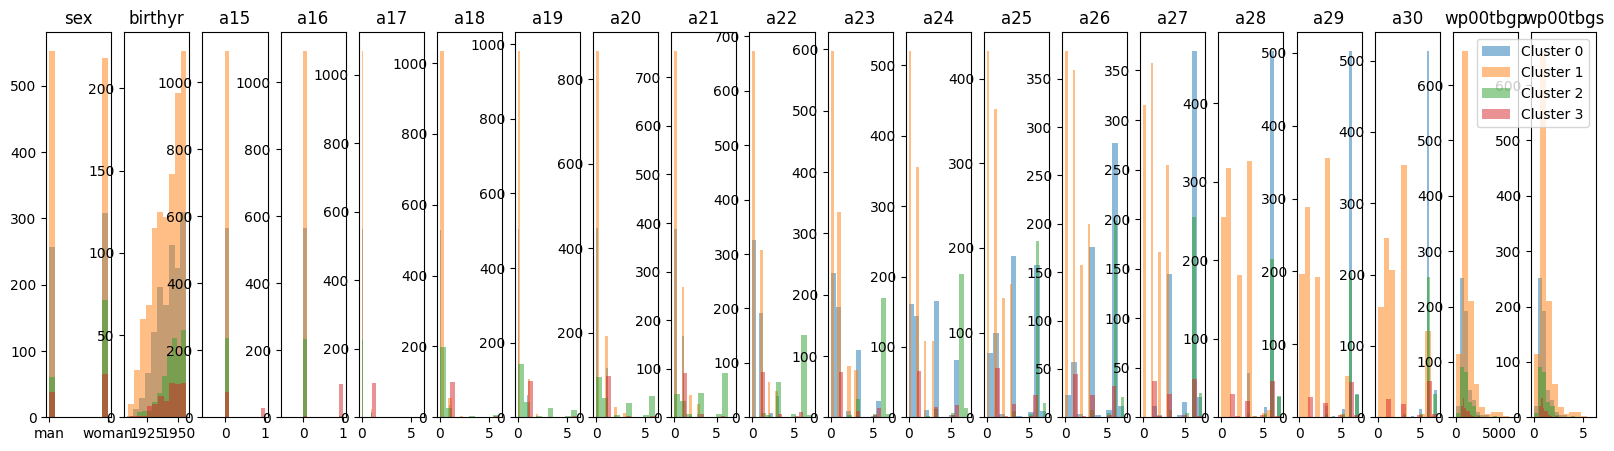

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Загрузка данных
df = pd.read_csv("biofam.csv", delimiter = ';')

# Удаление столбца id
df.drop(columns=['idhous'], inplace=True)
df.drop(columns=['nat_1_02'], inplace=True)
df.drop(columns=['plingu02'], inplace=True)
df.drop(columns=['p02r01'], inplace=True)
df.drop(columns=['p02r04'], inplace=True)
df.drop(columns=['cspfaj'], inplace=True)
df.drop(columns=['cspmoj'], inplace=True)

# Замена значений столбца sex
df['sex'].replace({0: 'woman', 1: 'man'}, inplace=True)

# Обработка пропущенных значений
df.replace(' ', np.nan, inplace=True)
df.dropna(inplace=True)

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['sex']))

# Кластеризация методом k-means
def kmeans_f(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans

# Вычисление индекса силуэта для каждого числа кластеров
def silhouette(X):
    silhouette_scores = []
    for n_clusters in range(2, 11):
        kmeans = kmeans_f(X, n_clusters)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    return silhouette_scores

# Визуализация индекса силуэта в зависимости от числа кластеров
silhouette_scores = silhouette(X_scaled)
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Кластеризация методом k-means
n_clusters = 4
kmeans = kmeans_f(X_scaled, n_clusters)

# Добавление меток кластеров в датафрейм 
df['cluster'] = kmeans.labels_

# Анализ кластеров
means = df.groupby(['cluster']).mean()
print(means)

# График анализа кластеров
fig, ax = plt.subplots(1, len(df.columns)-1, figsize=(20,5))
for i, col in enumerate(df.columns[:-1]):
    for cluster in range(n_clusters):
        ax[i].hist(df[df['cluster'] == cluster][col], alpha=0.5, label=f'Cluster {cluster}')
        ax[i].set_title(col)
plt.legend()
plt.show()